# Import libraries and data

In [15]:
# import libraries 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [16]:
data_path = os.getcwd() + "/Datasets/"
fig_path = os.getcwd() + "/Figures/"

## Feature brain data set

In [17]:
df_features = pd.read_csv(data_path + "/Features/df_features_brain.csv")
df_features

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,GlycoMine_N,GlycoMine_O,GlycoMine_C,GPI-anchor,Signal peptide,RNA_binding,DNA_binding,Prot_bind,Prot_bind_binary,CSF
0,Q8TDC3,MSSGAKEGGGGSPAYHLPHPHPHPPQHAQYVGPYRLEKTLGKGQTG...,778,85085.7493,0.051414,0.012853,0.043702,0.065553,0.029563,0.092545,...,1,1,0,0,0,0,0,0.029563,1,1
1,P48065,MDGKVAVQECGPPAVSWVPEEGEKLDQEDEDQVKDRGQWTNKMEFV...,614,69367.5176,0.052117,0.037459,0.030945,0.043974,0.083062,0.081433,...,1,0,0,0,0,0,0,0.340391,1,-1
2,Q9Y250,MGSVSSLISGHSFHSKHCRASQYKLRKSSHLKKLNRYSDGLLRFGF...,596,66612.1565,0.060403,0.011745,0.041946,0.104027,0.023490,0.072148,...,1,1,0,0,0,0,1,0.145973,1,-1
3,P0DMW5,MAASAALSAAAAAAALSGLAVRLSRSAAARGSYGAFCKGLTRTLLT...,78,8388.8176,0.230769,0.012821,0.012821,0.012821,0.064103,0.051282,...,0,0,0,0,0,0,0,1.000000,1,-1
4,P21579,MVSESHHEALAAPPVTTVATVLPSNATEPASPGEGKEDAFSKLKEK...,422,47572.5391,0.063981,0.014218,0.061611,0.082938,0.045024,0.059242,...,0,1,0,0,0,0,0,0.021327,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,Q8IZU8,MALMFTGHLLFLALLMFAFSTFEESVSNYSEWAVFTDDIDQFKTQK...,1212,139235.8716,0.067657,0.009076,0.045380,0.048680,0.063531,0.055281,...,0,0,0,0,1,0,0,0.000000,0,-1
2538,Q4JDL3,MSSPRDFRAEPVNDYEGNDSEAEDLNFRETLPSSSQENTPRSKVFE...,420,48422.3273,0.047619,0.019048,0.057143,0.083333,0.052381,0.045238,...,0,0,0,0,0,0,0,0.321429,1,-1
2539,Q8N4V2,MEEDLFQLRQLPVVKFRRTGESARSEDDTASGEHEVQIEGVHVGLE...,548,60768.4670,0.085766,0.023723,0.031022,0.062044,0.056569,0.082117,...,0,0,0,0,0,0,0,0.472628,1,-1
2540,P48426,MATPGNLGSSVLASKTKTKKKHFVAQKVKLFRASDPLLSVLMWGVN...,406,46224.0440,0.056650,0.009852,0.068966,0.073892,0.046798,0.051724,...,0,1,0,0,0,0,0,0.009852,1,-1


In [18]:
biomarker = df_features[df_features["Uniprot"] == "Q86UN2"]
df_features.iloc[1124][50:]

First60ExpAA                   0.23
PredHel                         0.0
PredHel_binary                    0
Cytoplasm                         0
Extracellular                     0
Lysosome/Vacuole                  0
Nucleus                           0
Cell_membrane                     1
Endoplasmic_reticulum             0
Mitochondrion                     0
Golgi_apparatus                   0
Peroxisome                        0
Plastid                           0
PS00232                           0
PS00237                           0
PS00027                           0
PS00028                           0
PS00022                           0
PS01186                           0
Glycosylation_*                 5.0
Glycosylation_**                0.0
Glycosylation_***               0.0
Glycosylation_binary_*            1
Glycosylation_binary_**           0
Glycosylation_binary_***          0
GlycoMine_N                       1
GlycoMine_O                       0
GlycoMine_C                 

## CSF data set

In [19]:
csf = pd.read_csv(data_path + "CSF/all_csf_1000plus.csv")
csf["#Studies"] = csf[["#Peptides_Macron2018A", "#Peptides_Macron2020", "#Peptides_Zhang2015",
    "#Peptides_Guldbrandsen2014", "#Peptides_Macron2018B", "#Peptides_Schutzer2010", "#Peptides_Pan2007"]].count(axis=1)

In [20]:
csf[csf["Uniprot"] == "Q86UN2"]

,Uniprot,#Peptides_Macron2018A,#Peptides_Macron2020,#Peptides_Zhang2015,#Peptides_Guldbrandsen2014,#Peptides_Macron2018B,#Peptides_Schutzer2010,#Peptides_Pan2007,#Studies
3010,Q86UN2,4.0,5.0,8.0,7.0,2.0,5.0,NaN,6


## Create stringent data sets

In [21]:
def increase_stringency_CSF(feature_df, csf_df, i):
    
    stringent_csf = csf_df[csf_df["#Studies"]>=i]["Uniprot"]
    remove_csf = set(df_features[df_features["CSF"] == 1]["Uniprot"]) - set(stringent_csf)
    df_stringent = df_features.drop(df_features[(df_features["CSF"] == 1) & (df_features["Uniprot"].isin(remove_csf))].index)
    
    print("Number of CSF proteins to be removed:", len(remove_csf))
    print("Number of CSF proteins left:", len(df_stringent[(df_stringent["CSF"] == 1)]))   
    
    return df_stringent

# create more stirngent data sets
df_features_2plus = increase_stringency_CSF(df_features, csf, 2)
print("Number of proteins in dataset:", len(df_features_2plus))
print("-------------")
df_features_3plus = increase_stringency_CSF(df_features, csf, 3)
print("Number of proteins in dataset:", len(df_features_3plus))

Number of CSF proteins to be removed: 303
Number of CSF proteins left: 692
Number of proteins in dataset: 2239
-------------
Number of CSF proteins to be removed: 454
Number of CSF proteins left: 541
Number of proteins in dataset: 2088


In [22]:
non_CSF = df_features[df_features["CSF"] == -1]
CSF_1plus = df_features[df_features["CSF"] == 1]
CSF_2plus = df_features_2plus[df_features_2plus["CSF"] == 1]
CSF_3plus = df_features_3plus[df_features_3plus["CSF"] == 1]

df_list = [non_CSF, CSF_1plus, CSF_2plus, CSF_3plus]
names = ["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"]

# Feature Analysis

In [23]:
def get_percentages(df_list, col):
        
    perc_list = []
    for i in range(len(df_list)):
        perc_list.append(sum(df_list[i][col])/len(df_list[i]))

    return perc_list

## Subcellular localization

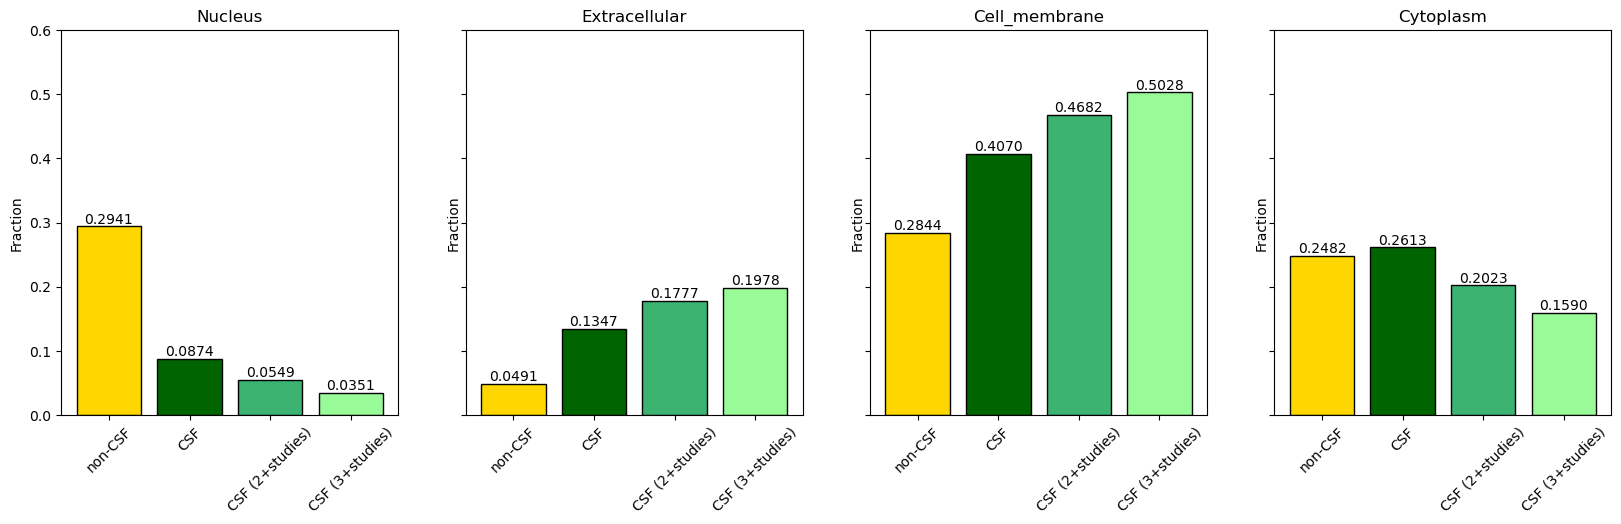

In [24]:
features = ["Nucleus", "Extracellular", "Cell_membrane", "Cytoplasm"]

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set(ylabel="Fraction", title=features[i], ylim=(0, 0.6))

plt.show()
fig.savefig(fig_path + "Bar_sucellular_localization_A.png", bbox_inches="tight")

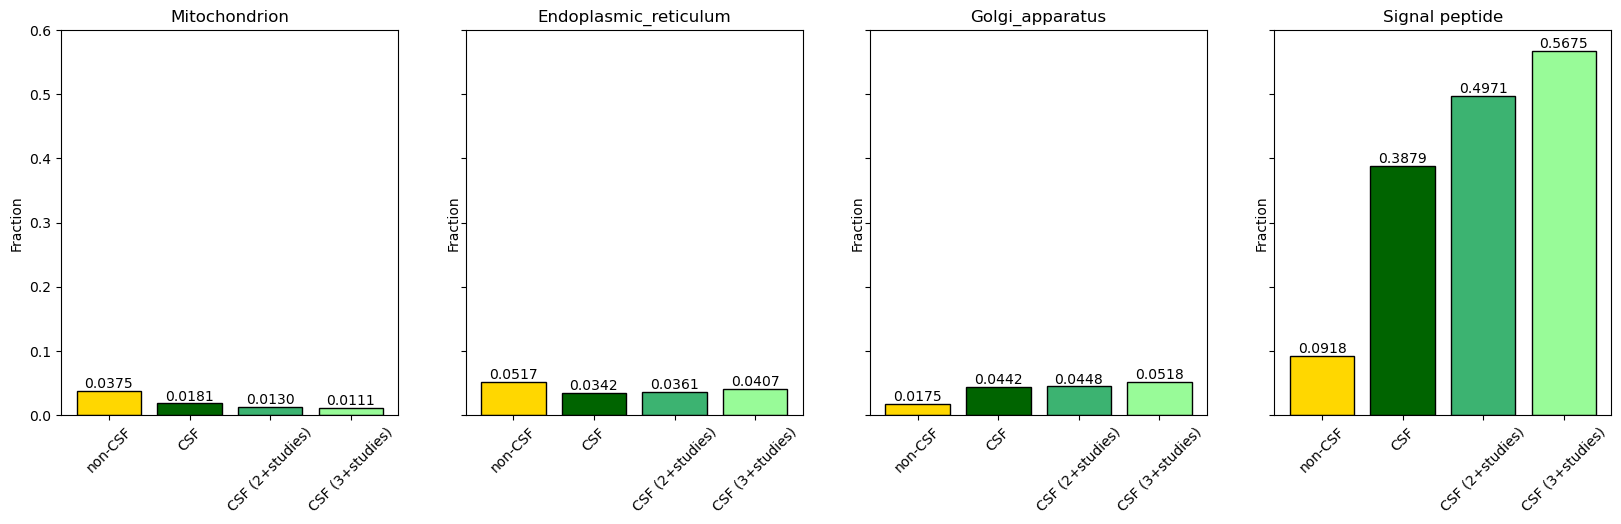

In [25]:
features = ["Mitochondrion", "Endoplasmic_reticulum", "Golgi_apparatus", "Signal peptide"]
# "Peroxisome"
# "Lysosome/Vacuole"
# "Plastid"

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
# ax[-1].axis("off")

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set(ylabel="Fraction", title=features[i], ylim=(0, 0.6))

plt.show()
fig.savefig(fig_path + "Bar_sucellular_localization_B.png", bbox_inches="tight")

## Glycosylation

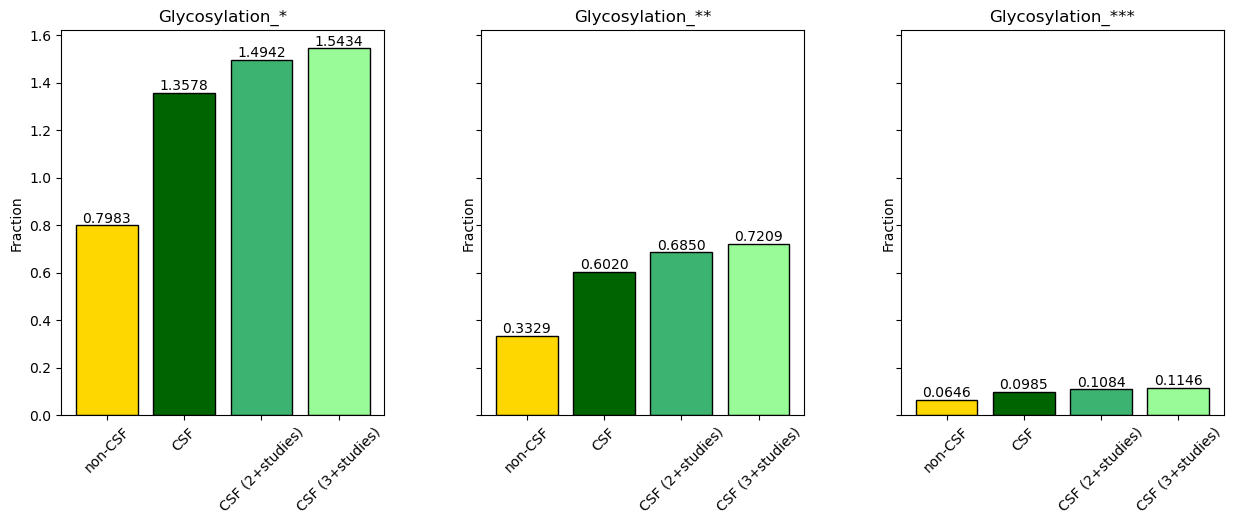

In [28]:
features = ["Glycosylation_*", "Glycosylation_**", "Glycosylation_***"]

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(wspace=0.3)

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set(ylabel="Fraction", title=features[i])

plt.show()
fig.savefig(fig_path + "Bar_NetNGlyc.png", bbox_inches="tight")

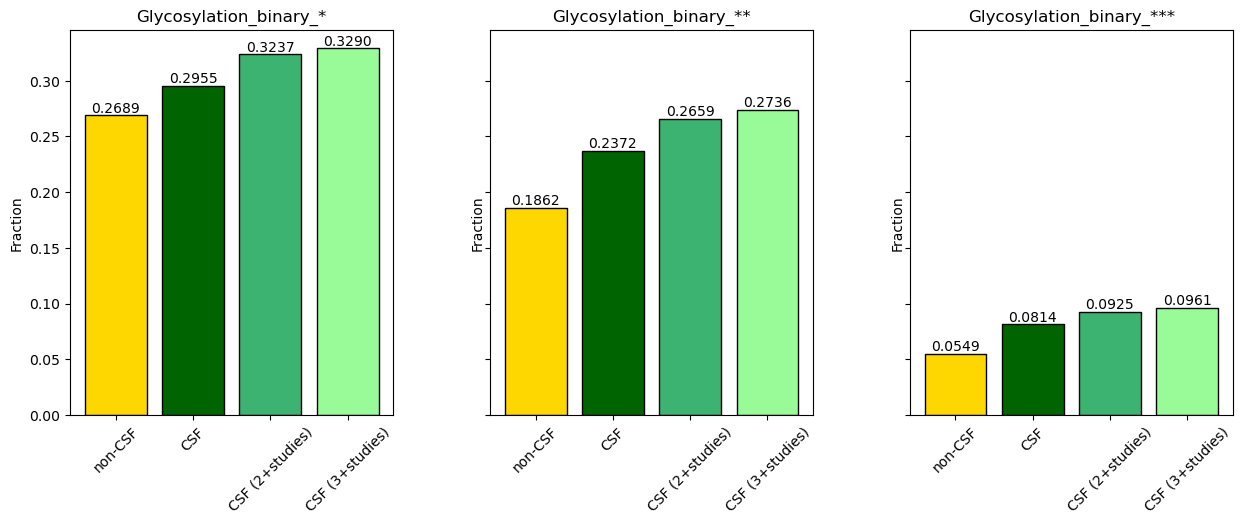

In [29]:
features = ["Glycosylation_binary_*", "Glycosylation_binary_**", "Glycosylation_binary_***"]

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(wspace=0.3)

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set(ylabel="Fraction", title=features[i])

plt.show()
fig.savefig(fig_path + "Bar_NetNGlyc_binary.png", bbox_inches="tight")

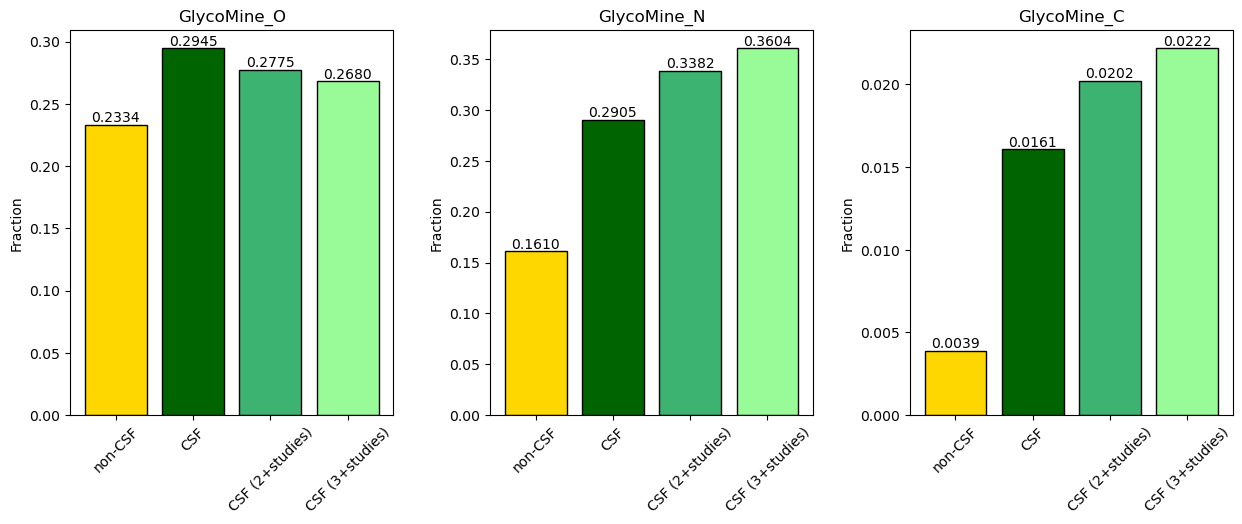

In [14]:
features = ["GlycoMine_O", "GlycoMine_N", "GlycoMine_C"]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.3)

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set(ylabel="Fraction", title=features[i])

plt.show()
fig.savefig(fig_path + "Bar_GlycoMine.png", bbox_inches="tight")

## Motifs

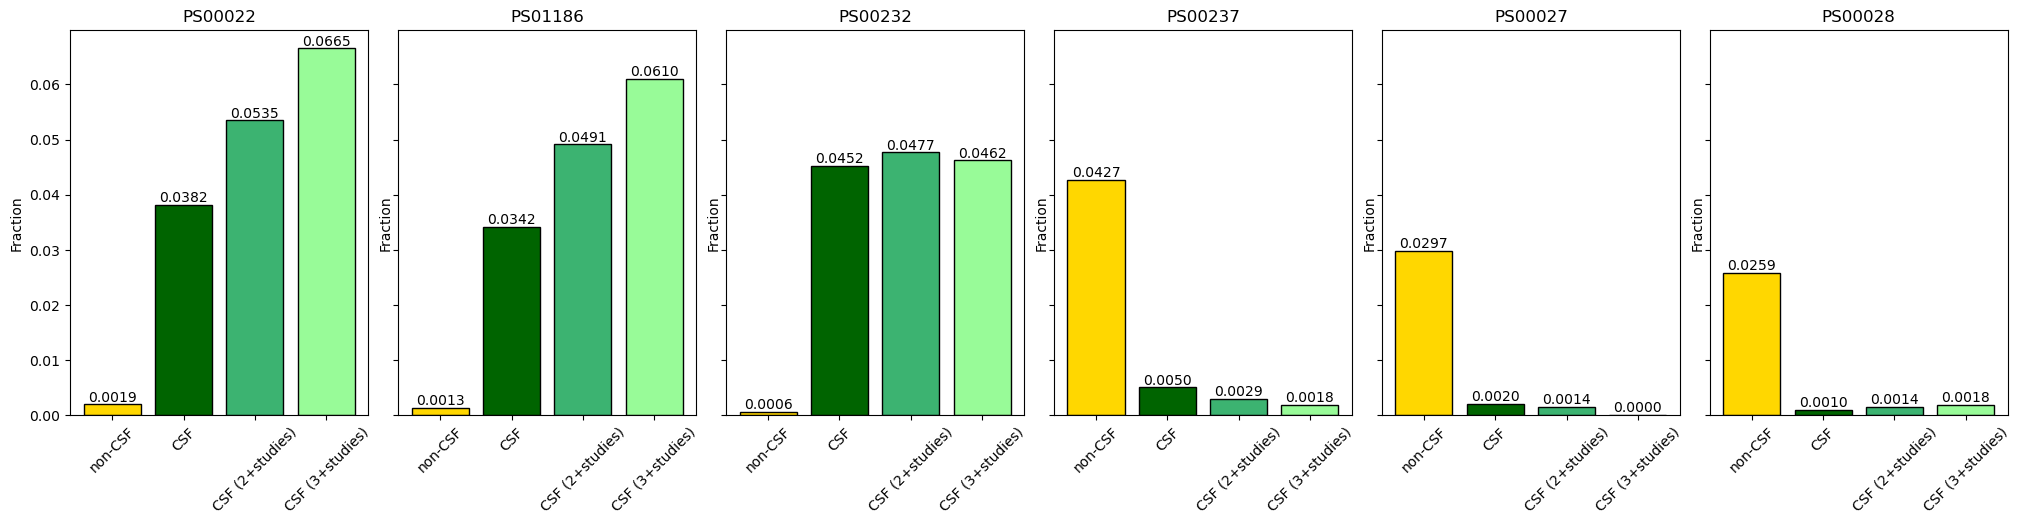

In [14]:
features = ["PS00022", "PS01186", "PS00232", "PS00237", "PS00027", "PS00028"]

# EGF1 (PS00022)
# EGF2 (PS01186)
# Cadherin-1 (PS00232)
# G-protein receptor F1 (PS00237)
# Homeobox (PS00027)
# Zinc Finger C2H2 (PS00028)


fig, ax = plt.subplots(1, 6, figsize=(25, 5), sharey=True)
plt.subplots_adjust(wspace=0.1)

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set(ylabel="Fraction", title=features[i])

plt.show()
fig.savefig(fig_path + "Bar_motifs.png", bbox_inches="tight")

## Transmembrane

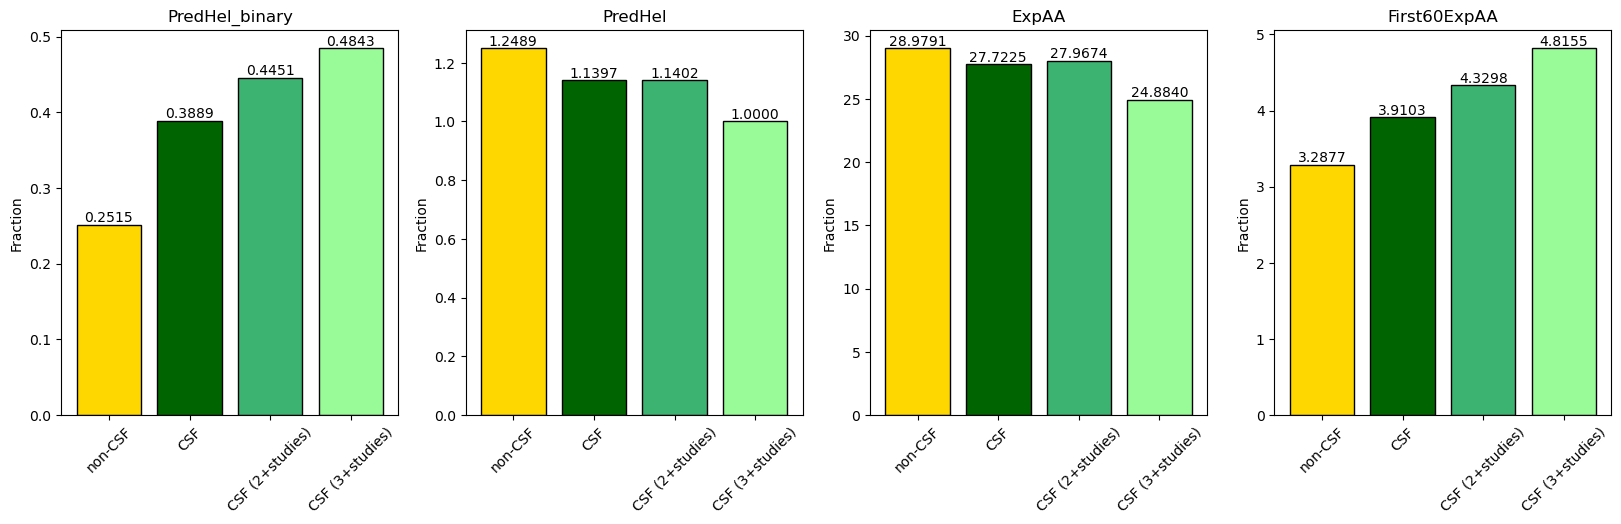

In [15]:
features = ["PredHel_binary", "PredHel", "ExpAA", "First60ExpAA"]

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set(ylabel="Fraction", title=features[i])

plt.show()
fig.savefig(fig_path + "Bar_transmembrane.png", bbox_inches="tight")

In [16]:
# empty dataframe 
tm_df = pd.DataFrame()

for i, data in enumerate(df_list):
    # add proportions of transmembrane region counts to dataframe
    tm = pd.Series(data["PredHel"].value_counts(normalize=True).sort_index(), name=names[i])
    tm_df = pd.merge(tm_df, tm, left_index=True, right_index=True, how="outer")
    
tm_df.reset_index(inplace=True)

In [17]:
# aggregate values of all proteins with >7 predicted transmembrane regions
tm_df_8plus = tm_df[8:].agg([sum])
# add aggregated values to transmembrane dataframe (remove single values for aggregated values)
tm_df = pd.concat([tm_df[:8], tm_df_8plus])
tm_df.loc["sum", "index"] = ">7"

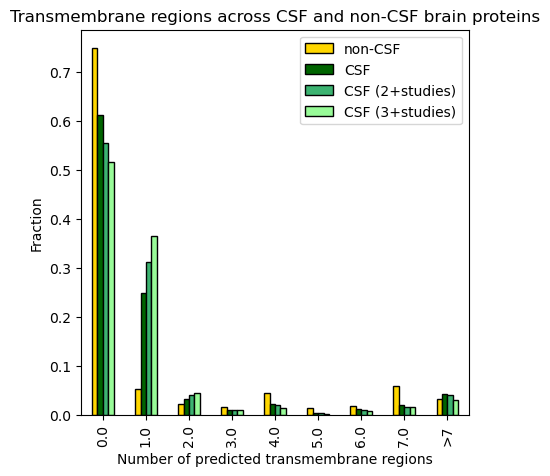

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))

tm_df.plot(x="index", y=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], kind="bar",
          color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black", ax=ax)
ax.set(xlabel="Number of predicted transmembrane regions", ylabel="Fraction", 
    title="Transmembrane regions across CSF and non-CSF brain proteins")

plt.show()   
fig.savefig(fig_path + "Bar_number_of_transmembrane_regions.png", bbox_inches="tight")

In [19]:
#### TO DO #####
# move this part to feature generation

def count_domains(df):
    
    domains = df["Topological domain"]
    
    df["Cytoplasmic_domain"] = 0
    df["Extracellular_domain"] = 0
    df["Lumenal_domain"] = 0
    df["Vesicular_domain"] = 0
    
    if type(domains) != str:
        return df
    else:
        df["Cytoplasmic_domain"] = domains.count("Cytoplasmic")
        df["Extracellular_domain"] = domains.count("Extracellular")
        df["Lumenal_domain"] = domains.count("Lumenal")
        df["Vesicular_domain"] = domains.count("Vesicular")
        
    return df

# def count_transmembrane_structures(df):
    
#     tm_structure = df["Transmembrane"]
    
#     df["Helix_TM"] = 0
#     df["Beta_stranded_TM"] = 0

#     if type(tm_structure) != str:
#         return df
#     else:
#         df["Helix_TM"] = tm_structure.count("Helical")
#         df["Beta_stranded_TM"] = tm_structure.count("Beta stranded")
        
#     return df

In [20]:
tm_info = pd.read_csv(data_path + "Features/Uniprot_topological_domain_transmembrane_human_proteome.tab", sep="\t", header=0, 
    names=["Uniprot", "Topological domain", "Transmembrane"])
# drop entries without information
tm_info.dropna(axis=0, how="all", subset=["Topological domain", "Transmembrane"], inplace=True)
# subset brain proteome
tm_info_brain = tm_info[tm_info["Uniprot"].isin(df_features["Uniprot"])]
tm_info_brain

,Uniprot,Topological domain,Transmembrane
15,Q7L8C5,"TOPO_DOM 1..6; /note=""Vesicular""; /evidence=...","TRANSMEM 7..29; /note=""Helical""; /evidence=""..."
16,Q9BT88,"TOPO_DOM 1..15; /note=""Vesicular""; /evidence...","TRANSMEM 16..36; /note=""Helical""; /evidence=..."
21,Q5DID0,"TOPO_DOM 22..1272; /note=""Extracellular""; /e...","TRANSMEM 1273..1293; /note=""Helical""; /evide..."
22,Q8TBG9,"TOPO_DOM 1..4; /note=""Cytoplasmic""; /evidenc...","TRANSMEM 5..25; /note=""Helical""; /evidence=""..."
50,Q9UKU6,"TOPO_DOM 1..40; /note=""Cytoplasmic""; /eviden...","TRANSMEM 41..61; /note=""Helical; Signal-ancho..."
...,...,...,...
20347,Q12879,"TOPO_DOM 23..555; /note=""Extracellular""; /ev...","TRANSMEM 556..576; /note=""Helical""; /evidenc..."
20354,Q13224,"TOPO_DOM 27..557; /note=""Extracellular""; /ev...","TRANSMEM 558..576; /note=""Helical""; /evidenc..."
20359,Q14957,"TOPO_DOM 20..554; /note=""Extracellular""; /ev...","TRANSMEM 555..573; /note=""Helical""; /evidenc..."
20362,O15399,"TOPO_DOM 28..584; /note=""Extracellular""; /ev...","TRANSMEM 585..603; /note=""Helical""; /evidenc..."


In [21]:
tm_info_brain = tm_info_brain.apply(count_domains, axis=1)
# tm_info_brain = tm_info_brain.apply(count_transmembrane_structures, axis=1)
tm_info_brain.drop(["Topological domain", "Transmembrane"], axis=1, inplace=True)
tm_info_brain

,Uniprot,Cytoplasmic_domain,Extracellular_domain,Lumenal_domain,Vesicular_domain
15,Q7L8C5,1,0,0,1
16,Q9BT88,1,0,0,1
21,Q5DID0,1,1,0,0
22,Q8TBG9,3,0,0,2
50,Q9UKU6,1,1,0,0
...,...,...,...,...,...
20347,Q12879,3,2,0,0
20354,Q13224,3,2,0,0
20359,Q14957,3,2,0,0
20362,O15399,3,2,0,0


In [22]:
df_features = df_features.merge(tm_info_brain, on="Uniprot", how="left")
df_features.fillna(0, inplace=True)
df_features

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,Signal peptide,RNA_binding,DNA_binding,Prot_bind,Prot_bind_binary,CSF,Cytoplasmic_domain,Extracellular_domain,Lumenal_domain,Vesicular_domain
0,Q8TDC3,MSSGAKEGGGGSPAYHLPHPHPHPPQHAQYVGPYRLEKTLGKGQTG...,778,85085.7493,0.051414,0.012853,0.043702,0.065553,0.029563,0.092545,...,0,0,0,0.029563,1,1,0.0,0.0,0.0,0.0
1,P48065,MDGKVAVQECGPPAVSWVPEEGEKLDQEDEDQVKDRGQWTNKMEFV...,614,69367.5176,0.052117,0.037459,0.030945,0.043974,0.083062,0.081433,...,0,0,0,0.340391,1,-1,2.0,1.0,0.0,0.0
2,Q9Y250,MGSVSSLISGHSFHSKHCRASQYKLRKSSHLKKLNRYSDGLLRFGF...,596,66612.1565,0.060403,0.011745,0.041946,0.104027,0.023490,0.072148,...,0,0,1,0.145973,1,-1,0.0,0.0,0.0,0.0
3,P0DMW5,MAASAALSAAAAAAALSGLAVRLSRSAAARGSYGAFCKGLTRTLLT...,78,8388.8176,0.230769,0.012821,0.012821,0.012821,0.064103,0.051282,...,0,0,0,1.000000,1,-1,0.0,0.0,0.0,0.0
4,P21579,MVSESHHEALAAPPVTTVATVLPSNATEPASPGEGKEDAFSKLKEK...,422,47572.5391,0.063981,0.014218,0.061611,0.082938,0.045024,0.059242,...,0,0,0,0.021327,1,1,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,Q8IZU8,MALMFTGHLLFLALLMFAFSTFEESVSNYSEWAVFTDDIDQFKTQK...,1212,139235.8716,0.067657,0.009076,0.045380,0.048680,0.063531,0.055281,...,1,0,0,0.000000,0,-1,0.0,0.0,0.0,0.0
2538,Q4JDL3,MSSPRDFRAEPVNDYEGNDSEAEDLNFRETLPSSSQENTPRSKVFE...,420,48422.3273,0.047619,0.019048,0.057143,0.083333,0.052381,0.045238,...,0,0,0,0.321429,1,-1,0.0,0.0,0.0,0.0
2539,Q8N4V2,MEEDLFQLRQLPVVKFRRTGESARSEDDTASGEHEVQIEGVHVGLE...,548,60768.4670,0.085766,0.023723,0.031022,0.062044,0.056569,0.082117,...,0,0,0,0.472628,1,-1,7.0,0.0,0.0,6.0
2540,P48426,MATPGNLGSSVLASKTKTKKKHFVAQKVKLFRASDPLLSVLMWGVN...,406,46224.0440,0.056650,0.009852,0.068966,0.073892,0.046798,0.051724,...,0,0,0,0.009852,1,-1,0.0,0.0,0.0,0.0


In [23]:
df_features["Cytoplasmic_domain_binary"] = np.where(df_features["Cytoplasmic_domain"] == 0, 0, 1)
df_features["Extracellular_domain_binary"] = np.where(df_features["Extracellular_domain"] == 0, 0, 1)
df_features["Lumenal_domain_binary"] = np.where(df_features["Lumenal_domain"] == 0, 0, 1)
df_features["Vesicular_domain_binary"] = np.where(df_features["Vesicular_domain"] == 0, 0, 1)
df_features

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,Prot_bind_binary,CSF,Cytoplasmic_domain,Extracellular_domain,Lumenal_domain,Vesicular_domain,Cytoplasmic_domain_binary,Extracellular_domain_binary,Lumenal_domain_binary,Vesicular_domain_binary
0,Q8TDC3,MSSGAKEGGGGSPAYHLPHPHPHPPQHAQYVGPYRLEKTLGKGQTG...,778,85085.7493,0.051414,0.012853,0.043702,0.065553,0.029563,0.092545,...,1,1,0.0,0.0,0.0,0.0,0,0,0,0
1,P48065,MDGKVAVQECGPPAVSWVPEEGEKLDQEDEDQVKDRGQWTNKMEFV...,614,69367.5176,0.052117,0.037459,0.030945,0.043974,0.083062,0.081433,...,1,-1,2.0,1.0,0.0,0.0,1,1,0,0
2,Q9Y250,MGSVSSLISGHSFHSKHCRASQYKLRKSSHLKKLNRYSDGLLRFGF...,596,66612.1565,0.060403,0.011745,0.041946,0.104027,0.023490,0.072148,...,1,-1,0.0,0.0,0.0,0.0,0,0,0,0
3,P0DMW5,MAASAALSAAAAAAALSGLAVRLSRSAAARGSYGAFCKGLTRTLLT...,78,8388.8176,0.230769,0.012821,0.012821,0.012821,0.064103,0.051282,...,1,-1,0.0,0.0,0.0,0.0,0,0,0,0
4,P21579,MVSESHHEALAAPPVTTVATVLPSNATEPASPGEGKEDAFSKLKEK...,422,47572.5391,0.063981,0.014218,0.061611,0.082938,0.045024,0.059242,...,1,1,1.0,0.0,0.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,Q8IZU8,MALMFTGHLLFLALLMFAFSTFEESVSNYSEWAVFTDDIDQFKTQK...,1212,139235.8716,0.067657,0.009076,0.045380,0.048680,0.063531,0.055281,...,0,-1,0.0,0.0,0.0,0.0,0,0,0,0
2538,Q4JDL3,MSSPRDFRAEPVNDYEGNDSEAEDLNFRETLPSSSQENTPRSKVFE...,420,48422.3273,0.047619,0.019048,0.057143,0.083333,0.052381,0.045238,...,1,-1,0.0,0.0,0.0,0.0,0,0,0,0
2539,Q8N4V2,MEEDLFQLRQLPVVKFRRTGESARSEDDTASGEHEVQIEGVHVGLE...,548,60768.4670,0.085766,0.023723,0.031022,0.062044,0.056569,0.082117,...,1,-1,7.0,0.0,0.0,6.0,1,0,0,1
2540,P48426,MATPGNLGSSVLASKTKTKKKHFVAQKVKLFRASDPLLSVLMWGVN...,406,46224.0440,0.056650,0.009852,0.068966,0.073892,0.046798,0.051724,...,1,-1,0.0,0.0,0.0,0.0,0,0,0,0


In [24]:
shed = pd.read_csv(data_path + "/Features/Known_shedding_proteins_DeepSMP.txt", sep="\t")
df_features["Ectodomain_shedding"] = np.where(df_features["Uniprot"].isin(shed["Uniprot ID"]), 1, 0)

In [25]:
# redo dataset creation with additional features
df_features_2plus = increase_stringency_CSF(df_features, csf, 2)
print("Number of proteins in dataset:", len(df_features_2plus))
print("-------------")
df_features_3plus = increase_stringency_CSF(df_features, csf, 3)
print("Number of proteins in dataset:", len(df_features_3plus))

non_CSF = df_features[df_features["CSF"] == -1]
CSF_1plus = df_features[df_features["CSF"] == 1]
CSF_2plus = df_features_2plus[df_features_2plus["CSF"] == 1]
CSF_3plus = df_features_3plus[df_features_3plus["CSF"] == 1]

df_list = [non_CSF, CSF_1plus, CSF_2plus, CSF_3plus]
names = ["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"]

Number of CSF proteins to be removed: 303
Number of CSF proteins left: 692
Number of proteins in dataset: 2239
-------------
Number of CSF proteins to be removed: 454
Number of CSF proteins left: 541
Number of proteins in dataset: 2088


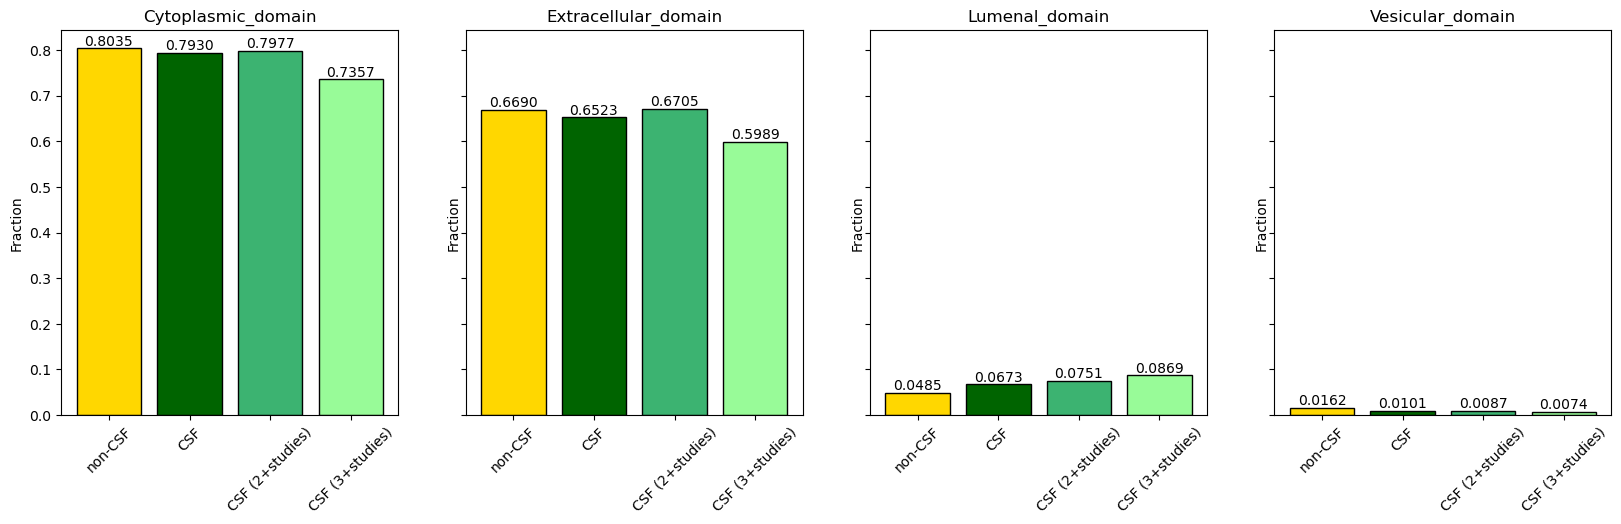

In [26]:
features = ["Cytoplasmic_domain", "Extracellular_domain", "Lumenal_domain", "Vesicular_domain"]

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set(ylabel="Fraction", title=features[i])

plt.show()

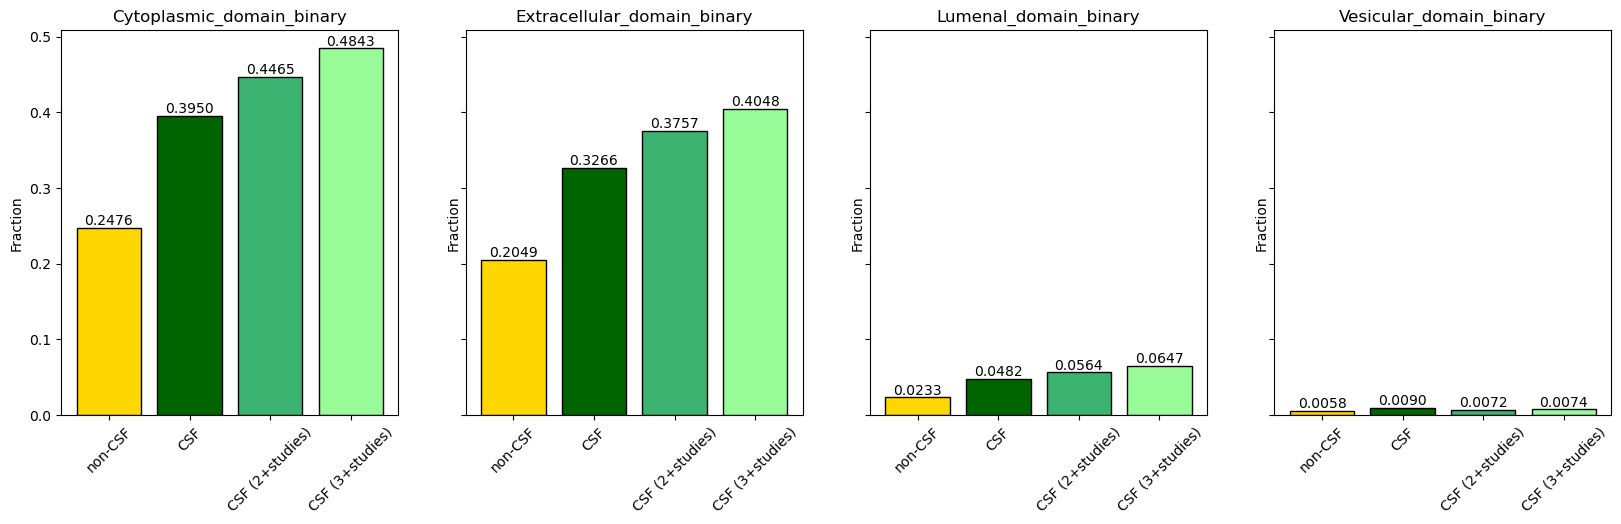

In [27]:
features = ["Cytoplasmic_domain_binary", "Extracellular_domain_binary", "Lumenal_domain_binary", "Vesicular_domain_binary"]

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set(ylabel="Fraction", title=features[i])

plt.show()

In [28]:
cytoplasmic_df = pd.DataFrame()

for i, data in enumerate(df_list):
    # add proportions of transmembrane region counts to dataframe
    top = pd.Series(data["Cytoplasmic_domain"].value_counts(normalize=True).sort_index(), name=names[i])
    cytoplasmic_df = pd.merge(cytoplasmic_df, top, left_index=True, right_index=True, how="outer")
cytoplasmic_df.reset_index(inplace=True)


extracellular_df = pd.DataFrame()

for i, data in enumerate(df_list):
    # add proportions of transmembrane region counts to dataframe
    top = pd.Series(data["Extracellular_domain"].value_counts(normalize=True).sort_index(), name=names[i])
    extracellular_df = pd.merge(extracellular_df, top, left_index=True, right_index=True, how="outer")
extracellular_df.reset_index(inplace=True)


lumenal_df = pd.DataFrame()

for i, data in enumerate(df_list):
    # add proportions of transmembrane region counts to dataframe
    top = pd.Series(data["Lumenal_domain"].value_counts(normalize=True).sort_index(), name=names[i])
    lumenal_df = pd.merge(lumenal_df, top, left_index=True, right_index=True, how="outer")
lumenal_df.reset_index(inplace=True)


vesicular_df = pd.DataFrame()

for i, data in enumerate(df_list):
    # add proportions of transmembrane region counts to dataframe
    top = pd.Series(data["Vesicular_domain"].value_counts(normalize=True).sort_index(), name=names[i])
    vesicular_df = pd.merge(vesicular_df, top, left_index=True, right_index=True, how="outer")
vesicular_df.reset_index(inplace=True)

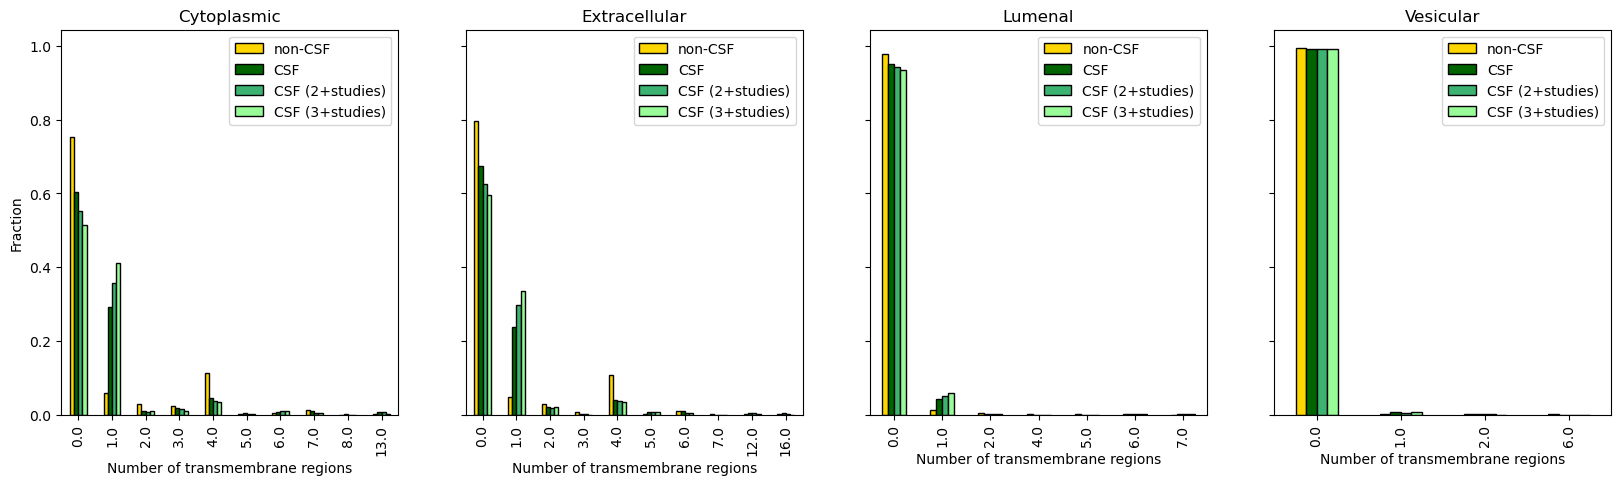

In [29]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

cytoplasmic_df.plot(x="index", y=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], kind="bar",
          color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black", ax=ax[0])
ax[0].set(xlabel="Number of transmembrane regions", ylabel="Fraction", 
    title="Cytoplasmic")

extracellular_df.plot(x="index", y=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], kind="bar",
          color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black", ax=ax[1])
ax[1].set(xlabel="Number of transmembrane regions", ylabel="Fraction", 
    title="Extracellular")

lumenal_df.plot(x="index", y=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], kind="bar",
          color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black", ax=ax[2])
ax[2].set(xlabel="Number of transmembrane regions", ylabel="Fraction", 
    title="Lumenal")

vesicular_df.plot(x="index", y=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], kind="bar",
          color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black", ax=ax[3])
ax[3].set(xlabel="Number of transmembrane regions", ylabel="Fraction", 
    title="Vesicular")

plt.show()   
fig.savefig(fig_path + "Bar_topological_domains_transmembrane.png", bbox_inches="tight")

### Ectodomain shedding annotations

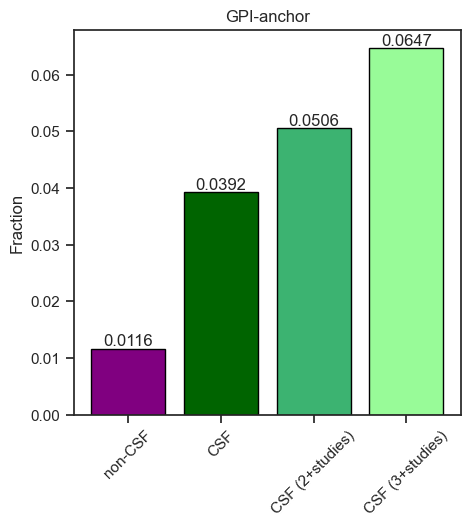

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

bars = plt.bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, 
    "GPI-anchor"), color=["purple", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black")
plt.bar_label(bars, fmt="%.4f")
ax.tick_params(axis="x", labelrotation=45)
ax.set(ylabel="Fraction", title="GPI-anchor")

plt.show()

## Residue binding

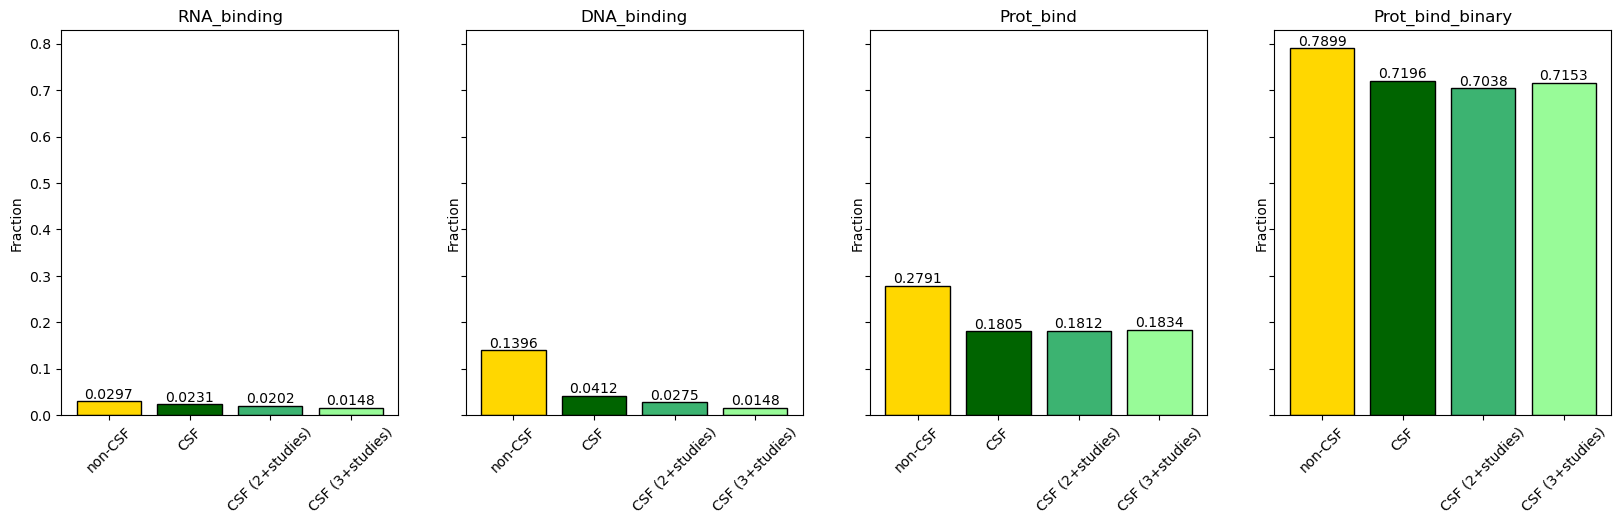

In [31]:
features = ["RNA_binding", "DNA_binding", "Prot_bind", "Prot_bind_binary"]

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set(ylabel="Fraction", title=features[i])

plt.show()
fig.savefig(fig_path + "Bar_residue_binding.png", bbox_inches="tight")

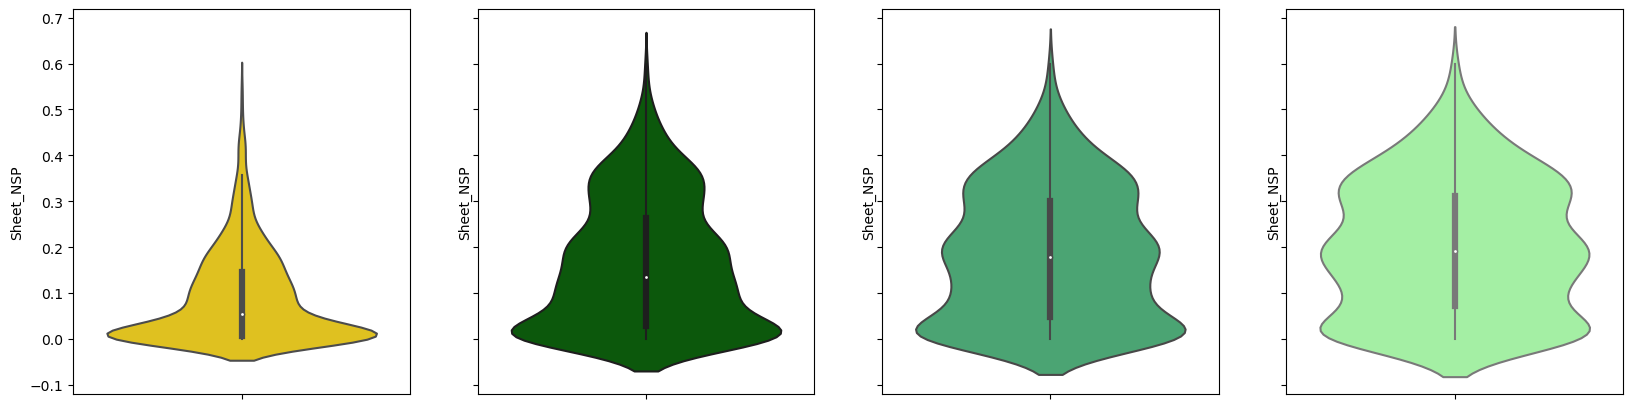

In [32]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
feature="Sheet_NSP"
color=["gold", "darkgreen", "mediumseagreen", "palegreen"]


sns.violinplot(data=non_CSF, y=feature, ax=ax[0], color=color[0])
sns.violinplot(data=CSF_1plus, y=feature, ax=ax[1], color=color[1])
sns.violinplot(data=CSF_2plus, y=feature, ax=ax[2], color=color[2])
sns.violinplot(data=CSF_3plus, y=feature, ax=ax[3], color=color[3])

# sns.boxplot(data=non_CSF, y=feature, ax=ax[0])
# sns.boxplot(data=CSF_1plus, y=feature, ax=ax[1])
# sns.boxplot(data=CSF_2plus, y=feature, ax=ax[2])
# sns.boxplot(data=CSF_3plus, y=feature, ax=ax[3])

plt.show()

# Figures for CSF Society Meeting 2022 abstract

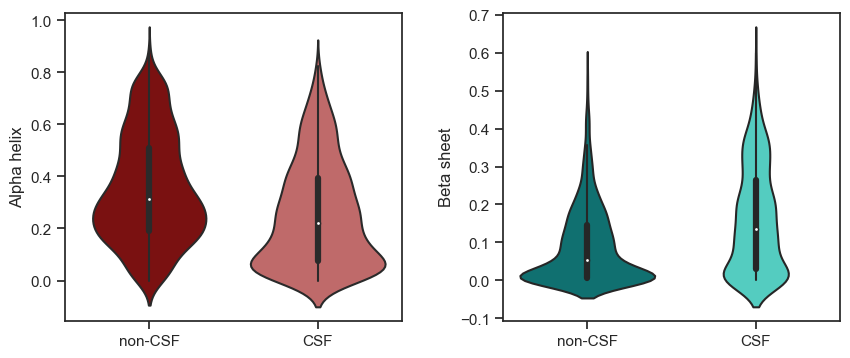

In [33]:
sns.set(style=("ticks"), font_scale=1)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(wspace=0.3)#, hspace=None)

sns.violinplot(y="Helix_NSP",  x="CSF", data=df_features, ax=axes[0], palette=["darkred", "indianred"])
axes[0].set(xlabel=None, ylabel="Alpha helix", xticklabels=["non-CSF", "CSF"])
sns.violinplot(y="Sheet_NSP",  x="CSF", data=df_features, ax=axes[1], palette=["teal", "turquoise"])
axes[1].set(xlabel=None, ylabel="Beta sheet", xticklabels=["non-CSF", "CSF"])

plt.show()
fig.savefig(fig_path + "CSF_society_meeting_Figure2.png", bbox_inches="tight")

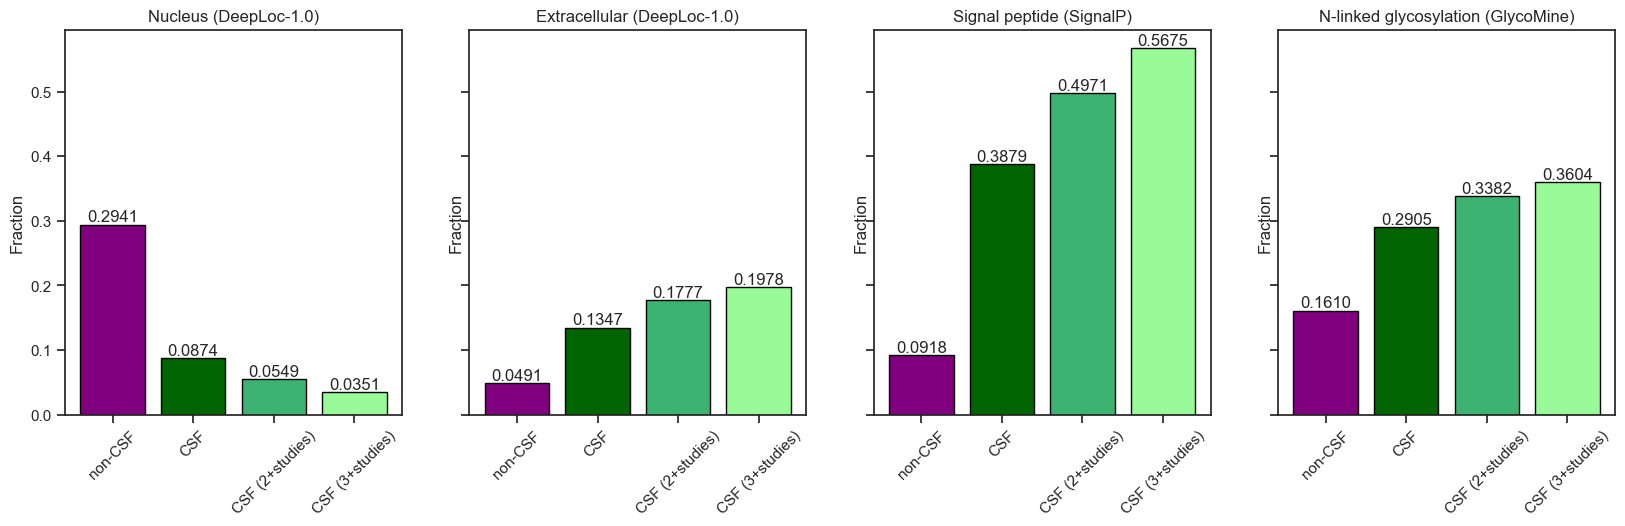

In [36]:
features = ["Nucleus", "Extracellular", "Signal peptide", "GlycoMine_N"]
names = ["Nucleus (DeepLoc-1.0)", "Extracellular (DeepLoc-1.0)", "Signal peptide (SignalP)", 
            "N-linked glycosylation (GlycoMine)"]

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["purple", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set(ylabel="Fraction", title=names[i])

plt.show()
fig.savefig(fig_path + "CSF_society_meeting_poster_A.png", bbox_inches="tight")

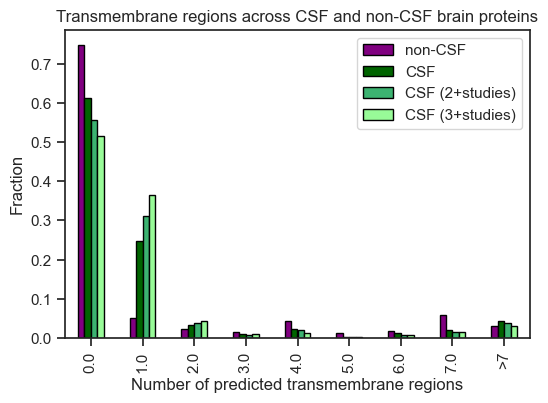

In [35]:
sns.set(style=("ticks"), font_scale=1)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

tm_df.plot(x="index", y=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], kind="bar",
          color=["purple", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black", ax=ax)
ax.set(xlabel="Number of predicted transmembrane regions", ylabel="Fraction", 
    title="Transmembrane regions across CSF and non-CSF brain proteins")

plt.show()   
fig.savefig(fig_path + "CSF_society_meeting_poster_B.png", bbox_inches="tight")